In [1]:
#%matplotlib inlin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import random
import heapq


In [2]:
#** code for plotting **

step_size = 10
start_color = np.array([0,0,255]) #blue
goal_color = np.array([0,255,0]) #green
fire_color = np.array([0,0,0])#black
neighbor_color = np.array([220,220,220])#gray
fringe_color = np.array([128,128,128])#yellow
explored_color = np.array([255,0,0])#red
node_color = np.array([255,165,0])#orange

def plot_fire(fire_set, dim):
    fig = plt.figure()

    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0


    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color
    plt.xticks([], [])
    plt.yticks([], [])
    
    for i in range(dim):
        for j in range(dim):
            if (i,j) in fire_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = fire_color
    plt.imshow(prob_map)
    
def node_plot(prob_map, node, color, alpha=1.0):
    prob_map[node[0]*step_size:node[0]*step_size+step_size-1,node[1]*step_size:node[1]*step_size+step_size-1] = color*alpha
    
    
def path_plot(path, dim, fire_set):
    # plot given the info as listed 
    #fig = plt.figure()
    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0
    
    for i in range(dim):
        for j in range(dim):
            if (i,j) in fire_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = fire_color

    for i in range(len(path)):
        node = path[i]
        node_plot(prob_map, node, node_color, alpha=i/len(path)+1.0)

    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color


    plt.xticks([], [])
    plt.yticks([], [])

    img = plt.imshow(prob_map)
    return img

In [3]:
def dfs_search(dim, fire_set):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    start = (0,0)
    goal = (dim-1, dim-1)
    explored_spaces = set([])
    fringe = [(start, [])]
    #imgs = []
    #fig = plt.figure()
    win_flag = False

    #parent_map = [[(0,0) for i in range(dim)] for i in range(dim)]
    #parent_fringe = [(-1,-1)]

    while len(fringe) > 0:
        node, path = fringe.pop(-1)
    
        if node in explored_spaces:
            continue
        if node in fire_set:
            continue
        
        path.append(node)
    
        if node[0] == goal[0] and node[1] == goal[1]:
            print("You have found the goal")
            win_flag = True
            break
        
    
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
        
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in fire_set:
                continue
            if (x,y) not in fringe:
                fringe.append(((x,y), path[:]))
    
        explored_spaces.add(node)
        
    if win_flag == False:
        print("There is no path from start to goal")
        return
    
    
    print("Path length: " + str(len(path)-1))
    path_plot(path, dim, fire_set)
    return True

In [4]:
def bfs_search(dim, fire_set):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    start = (0,0)
    goal = (dim-1, dim-1)
    explored_spaces = set([])
    fringe = [(start, [])]
    win_flag = False


    while len(fringe) > 0:
        node, shortest_path = fringe.pop(0)
        
    
        if node in explored_spaces:
            continue
        if node in fire_set:
            continue
            
        shortest_path.append(node)
    
        if node[0] == goal[0] and node[1] == goal[1]:
            print("You have found the goal")
            win_flag = True
            break

    
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
        
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in fire_set:
                continue
            if (x,y) not in fringe:
                fringe.append(((x,y), shortest_path[:]))
       
    
        explored_spaces.add(node)
        
    if win_flag == False:
        print("There is no path from start to goal")
        return False
    
    
    print("Shortest path: " + str(len(shortest_path)-1))
    path_plot(shortest_path, dim, fire_set)
    return True

In [5]:
def euclidean(start,end):
    distance = ((end[0]-start[0])**2 + (end[1]-start[1])**2)**0.5
    return distance

In [6]:
def A_search(dim, fire_set):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    start = (0,0)
    goal = (dim-1, dim-1)
    explored_spaces = set([])
    #print("euclidean: " + str(euclidean(start,goal)))
    fringe = [(euclidean(start,goal), 0, start, [])]
    heapq.heapify(fringe)
    win_flag = False


    while len(fringe) > 0:
        #print(fringe)
        heuristic, distance, node, path = heapq.heappop(fringe)

        if node in explored_spaces:
            continue
        if node in fire_set:
            continue
            
        path.append(node)
        
        if node[0] == goal[0] and node[1] == goal[1]:
            print("You have found the goal")
            win_flag = True
            break

        distance += 1
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
        
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in fire_set:
                continue
            if (x,y) not in fringe:
                heapq.heappush(fringe, (distance + euclidean((x,y),goal), distance, (x,y), path[:]))
       
        explored_spaces.add(node)
        
    if win_flag == False:
        print("There is no path from start to goal")
        return False
    
    
    print("A* path: " + str(len(path)-1))
    path_plot(path, dim, fire_set)
    return True

Enter dimension of maze: 5
Enter probability of fire: 0.2


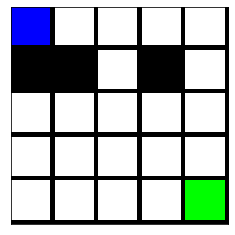

In [7]:
#take input from user
while True:
    try:
        dim = int(input("Enter dimension of maze: "))
        if dim < 3:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. Dimension must be at least 3.")

while True:
    try:
        p = float(input("Enter probability of fire: "))
        if p < 0 or p > 1:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. Probability must be in the range (0,1).")



#print(dim)
#print(p)

fire_set = set([])
for i in range(dim):
    for j in range(dim):
        if i == 0 and j == 0 or i == dim-1 and j == dim-1:
            continue
        if random.uniform(0,1) < p:
            fire_set.add((i,j))
#print(fire_set)            
plot_fire(fire_set, dim)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Path length: 8


True

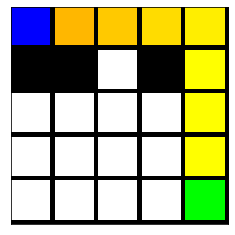

In [8]:
#DFS
dfs_search(dim, fire_set)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal
Shortest path: 8


True

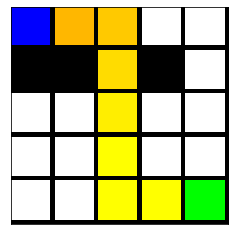

In [9]:
#BFS
bfs_search(dim, fire_set)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[(5.656854249492381, 0, (0, 0), [])]
[(6.0, 1, (0, 1), [(0, 0)])]
[(6.47213595499958, 2, (0, 2), [(0, 0), (0, 1)])]
[(6.60555127546399, 3, (1, 2), [(0, 0), (0, 1), (0, 2)]), (7.123105625617661, 3, (0, 3), [(0, 0), (0, 1), (0, 2)])]
[(6.82842712474619, 4, (2, 2), [(0, 0), (0, 1), (0, 2), (1, 2)]), (7.123105625617661, 3, (0, 3), [(0, 0), (0, 1), (0, 2)])]
[(7.123105625617661, 3, (0, 3), [(0, 0), (0, 1), (0, 2)]), (7.23606797749979, 5, (2, 3), [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]), (7.23606797749979, 5, (3, 2), [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]), (8.60555127546399, 5, (2, 1), [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)])]
[(7.23606797749979, 5, (2, 3), [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]), (8.0, 4, (0, 4), [(0, 0), (0, 1), (0, 2), (0, 3)]), (7.23606797749979, 5, (3, 2), [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]), (8.60555127546399, 5, (2, 1), [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)])]
[(7.23606797749979, 5, (3, 2), [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]), (7.414213562373095, 

True

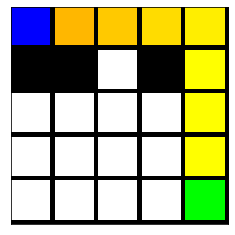

In [10]:
#A*
A_search(dim, fire_set)